In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Load CSV
df = pd.read_csv(r"C:\Users\snity\OneDrive\Desktop\Civil_Service_List__Active__20250306 (2).csv")

In [15]:
# Step 2: Show basic info
print("Dataset Information:")
print(df.info())
# Number of null values before cleaning of data
print("\nNumber of null values before cleaning the data: \n", df.isnull().sum().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467706 entries, 0 to 467705
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Exam No             467706 non-null  int64  
 1   List No             467706 non-null  float64
 2   First Name          467700 non-null  object 
 3   MI                  255405 non-null  object 
 4   Last Name           467700 non-null  object 
 5   Adj. FA             467706 non-null  float64
 6   List Title Code     467706 non-null  int64  
 7   List Title Desc     467706 non-null  object 
 8   Group No            467706 non-null  int64  
 9   List Agency Code    467706 non-null  int64  
 10  List Agency Desc    467706 non-null  object 
 11  List Div Code       0 non-null       float64
 12  Published Date      207108 non-null  object 
 13  Established Date    450195 non-null  object 
 14  Anniversary Date    450195 non-null  object 
 15  Extension Dat

In [17]:
# Step 3: Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("N/A")
    else:
        df[col] = df[col].fillna(0)

# Number of null values after cleaning of data
print("\nNumber of values null after cleaning the data: \n", df.isnull().sum().sum())


Number of values null after cleaning the data: 
 0


In [19]:
# Step 4: Show value counts for important categorical columns
cat_cols = ['List Title Desc', 'List Agency Desc', 'Group No']
for col in cat_cols:
    if col in df.columns:
        print(f"\nValue Counts for {col}:")
        print(df[col].value_counts())


Value Counts for List Title Desc:
List Title Desc
POLICE OFFICER                                        80773
FIREFIGHTER                                           46341
CONDUCTOR                                             32749
SANITATION WORKER                                     31294
SCHOOL SAFETY AGENT                                   13243
                                                      ...  
ADMINISTRATIVE SUPERINTENDENT OF BRIDGE OPERATIONS        1
DEPARTMENT LIBRARIAN                                      1
PROJECT MANAGER INTERN                                    1
INSURANCE ADVISER (HOUSING AUTHORITY)                     1
CARRIAGE UPHOLSTERER                                      1
Name: count, Length: 494, dtype: int64

Value Counts for List Agency Desc:
List Agency Desc
OPEN COMPETITIVE                         420097
POLICE DEPARTMENT                         10095
FIRE DEPARTMENT                            9345
N.Y.C. TRANSIT AUTHORITY                   8099
HRA/D

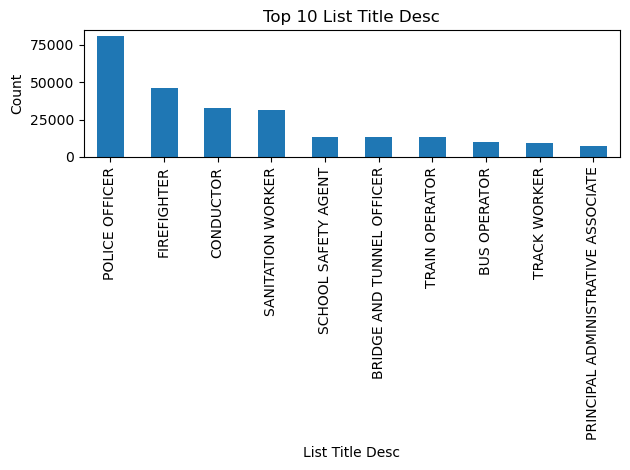

In [27]:
# Step 5: Bar plot for 'List Title Desc' (Top 10)if 'List Title Desc' in df.columns:
top_titles = df['List Title Desc'].value_counts().head(10)
top_titles.plot(kind='bar', title='Top 10 List Title Desc')
plt.xlabel('List Title Desc')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

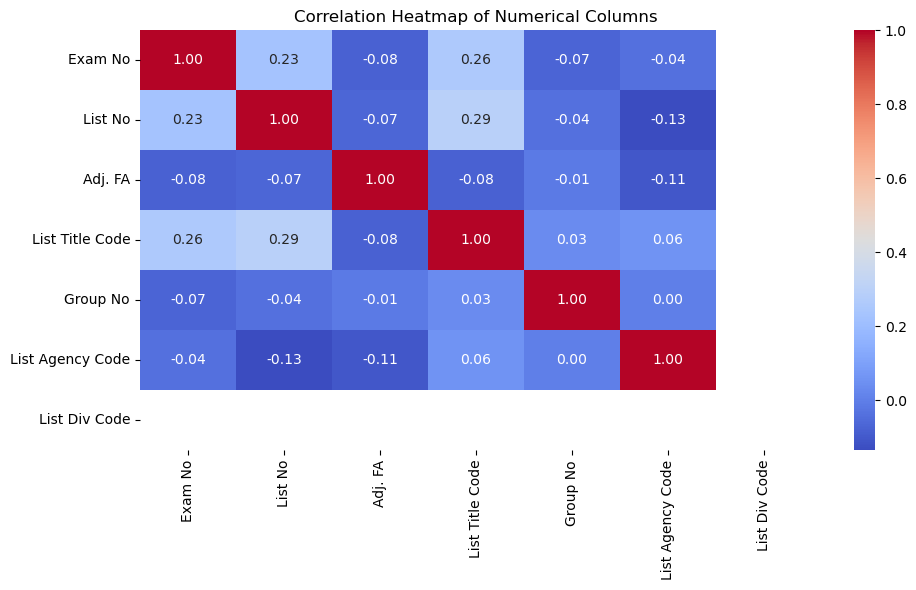

In [29]:
# Step 6: Heatmap of numerical correlations
numeric_cols = df.select_dtypes(include='number')
correlation = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.tight_layout()
plt.show()


In [31]:
# Step 7: Correlation + t-test between 'Adj. FA' and 'List No'
col1 = 'Adj. FA'
col2 = 'List No'
if col1 in numeric_cols.columns and col2 in numeric_cols.columns:
    corr_value = df[col1].corr(df[col2])
    print(f"\nCorrelation between '{col1}' and '{col2}': {corr_value:.2f}")
    if corr_value > 0.7:
        relation = "strong positive correlation"
    elif corr_value > 0.3:
        relation = "moderate positive correlation"
    elif corr_value > 0:
        relation = "weak positive correlation"
    elif corr_value < -0.7:
        relation = "strong negative correlation"
    elif corr_value < -0.3:
        relation = "moderate negative correlation"
    elif corr_value < 0:
        relation = "weak negative correlation"
    else:
        relation = "no correlation"
    print(f"The columns '{col1}' and '{col2}' have a {relation}, meaning as the value of '{col1}' changes, '{col2}' tends to {'increase' if corr_value > 0 else 'decrease' if corr_value < 0 else 'remain unchanged'}.")


Correlation between 'Adj. FA' and 'List No': -0.07
The columns 'Adj. FA' and 'List No' have a weak negative correlation, meaning as the value of 'Adj. FA' changes, 'List No' tends to decrease.


In [58]:

# Step 8: Perform a t-test
if col1 in df.columns and col2 in df.columns:
    filtered_df = df[(df[col1] != 0) & (df[col2] != 0)]
    sample1 = filtered_df[col1]
    sample2 = filtered_df[col2]

    if len(sample1) > 30 and len(sample2) > 30:
        t_stat, p_value = stats.ttest_ind(sample1, sample2)
        print(f"\nT-Test Result between '{col1}' and '{col2}':")
        print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
        if p_value < 0.05:
            print("Conclusion: The difference between the two means is statistically significant (p < 0.05).")
        else:
            print("Conclusion: No significant difference between the two means (p ≥ 0.05).")
    else:
        print(f"\nNot enough data to perform t-test (need > 30 samples in each). Got {len(sample1)} and {len(sample2)}.")
else:
    print(f"\nColumns '{col1}' or '{col2}' not found in DataFrame.")



T-Test Result between 'Adj. FA' and 'List No':
T-statistic: -418.2702, P-value: 0.0000
Conclusion: The difference between the two means is statistically significant (p < 0.05).


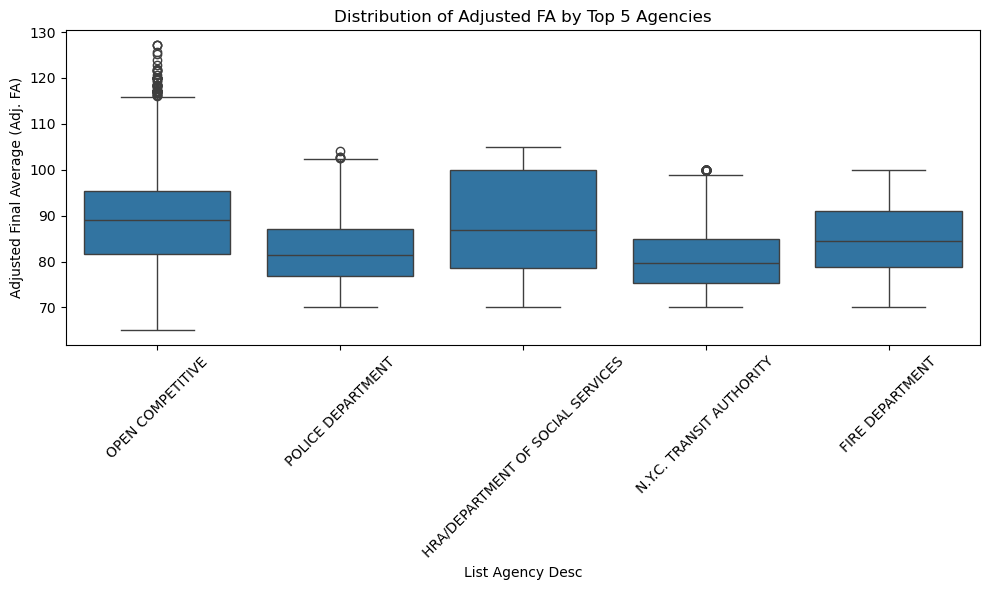

In [60]:
# Step 9: Boxplot of 'Adj. FA' by 'List Agency Desc' (Top 5 Agencies)
if 'List Agency Desc' in df.columns and 'Adj. FA' in df.columns:
    top_agencies = df['List Agency Desc'].value_counts().head(5).index
    filtered_df = df[df['List Agency Desc'].isin(top_agencies) & (df['Adj. FA'] != 0)]

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=filtered_df, x='List Agency Desc', y='Adj. FA')
    plt.title('Distribution of Adjusted FA by Top 5 Agencies')
    plt.xlabel('List Agency Desc')
    plt.ylabel('Adjusted Final Average (Adj. FA)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

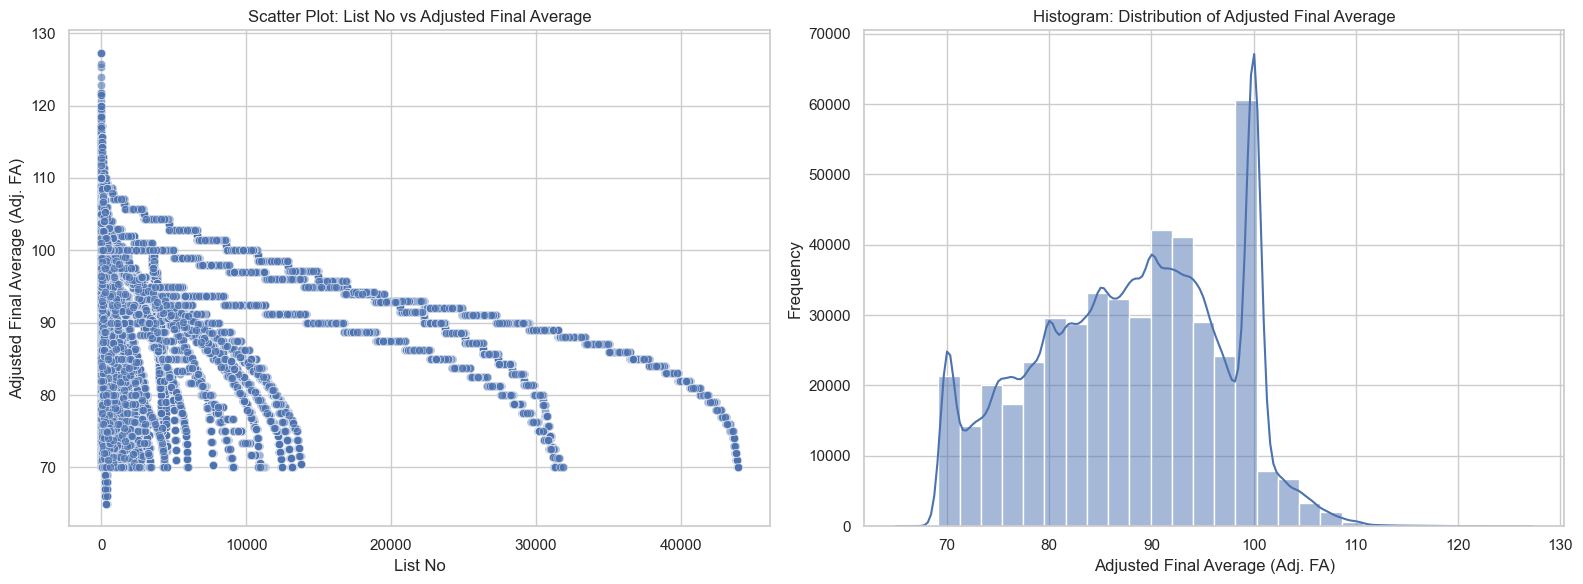

In [62]:
#Step 10: Scatter plot and Histogram
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(ax=axes[0], data=df, x="List No", y="Adj. FA", alpha=0.6)
axes[0].set_title("Scatter Plot: List No vs Adjusted Final Average")
axes[0].set_xlabel("List No")
axes[0].set_ylabel("Adjusted Final Average (Adj. FA)")

sns.histplot(df["Adj. FA"].dropna(), bins=30, kde=True, ax=axes[1])
axes[1].set_title("Histogram: Distribution of Adjusted Final Average")
axes[1].set_xlabel("Adjusted Final Average (Adj. FA)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

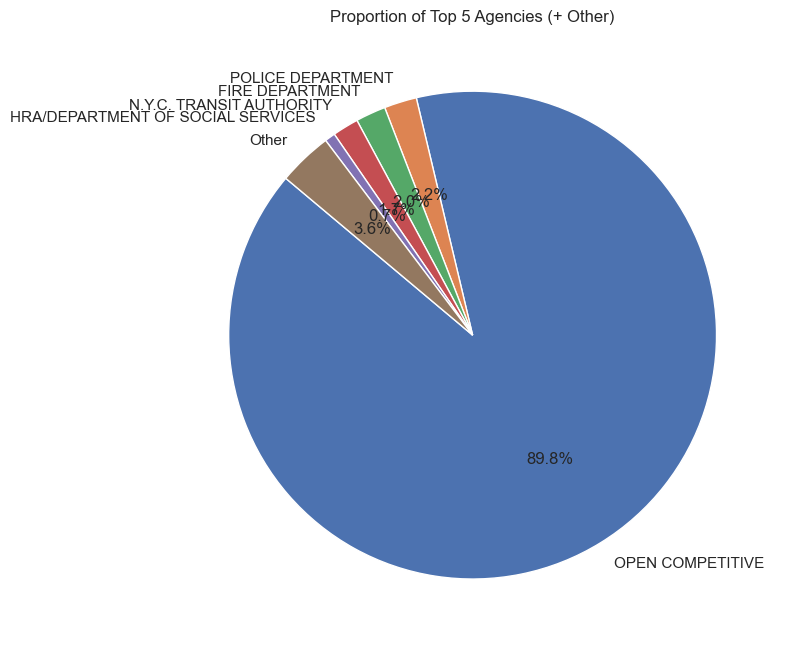

In [64]:
# Step 11: Pie chart for 'List Agency Desc' (Top 5)
if 'List Agency Desc' in df.columns:
    top_agency_counts = df['List Agency Desc'].value_counts().head(5)
    other_count = df['List Agency Desc'].value_counts().iloc[5:].sum()

    pie_data = pd.concat([top_agency_counts, pd.Series({'Other': other_count})])

    plt.figure(figsize=(8, 8))
    plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140)
    plt.title('Proportion of Top 5 Agencies (+ Other)')
    plt.tight_layout()
    plt.show()